In [1]:
import ssl

import matplotlib.pyplot as plt
import numpy as np
import vaex

ssl_context = ssl._create_unverified_context()

In [2]:
df = vaex.example()
df

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.2318684,-0.39692867,-0.59805775,301.15527,174.05948,27.427546,-149431.4,407.38898,333.95554,-1.0053853
1,23,-0.16370061,3.6542213,-0.25490645,-195.00023,170.47217,142.53023,-124247.95,890.24115,684.6676,-1.708667
2,32,-2.120256,3.3260527,1.7078403,-48.63423,171.6473,-2.0794373,-138500.55,372.2411,-202.17618,-1.8336141
3,8,4.715589,4.585251,2.2515438,-232.42084,-294.85083,62.85865,-60037.04,1297.6304,-324.6875,-1.4786882
4,16,7.217187,11.994717,-1.0645622,-1.6891745,181.32935,-11.333611,-83206.84,1332.799,1328.949,-1.8570484
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",21,1.9938701,0.7892761,0.2220599,-216.9299,16.12442,-211.24438,-146457.44,457.72247,203.36758,-1.7451677
"329,996",25,3.7180912,0.7213376,1.6415337,-185.9216,-117.250824,-105.49866,-126627.11,335.00256,-301.837,-0.9822322
"329,997",14,0.36885077,13.029609,-3.6339347,-53.677147,-145.15771,76.7091,-84912.26,817.1376,645.8507,-1.7645613
"329,998",18,-0.112592645,1.4529126,2.1689527,179.30865,205.7971,-68.75873,-133498.47,724.00024,-283.69104,-1.8808953


In [3]:
df.x

Expression = x
Length: 330,000 dtype: float32 (column)
---------------------------------------
     0    1.23187
     1  -0.163701
     2   -2.12026
     3    4.71559
     4    7.21719
       ...       
329995    1.99387
329996    3.71809
329997   0.368851
329998  -0.112593
329999    20.7962

In [4]:
df.x.values

array([ 1.2318684 , -0.16370061, -2.120256  , ...,  0.36885077,
       -0.11259264, 20.79622   ], dtype=float32)

In [5]:
np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)

Expression = sqrt((((x ** 2) + (y ** 2)) + (z ** 2)))
Length: 330,000 dtype: float32 (expression)
-------------------------------------------
     0  1.42574
     1  3.66676
     2  4.29824
     3  6.95203
     4   14.039
      ...      
329995  2.15587
329996  4.12785
329997  13.5319
329998  2.61304
329999  24.3339

In [6]:
df['r'] = np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)
df[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,1.2318684,-0.39692867,-0.59805775,1.4257367
1,-0.16370061,3.6542213,-0.25490645,3.6667573
2,-2.120256,3.3260527,1.7078403,4.298236
3,4.715589,4.585251,2.2515438,6.9520326
4,7.217187,11.994717,-1.0645622,14.039028
...,...,...,...,...
"329,995",1.9938701,0.7892761,0.2220599,2.1558723
"329,996",3.7180912,0.7213376,1.6415337,4.127852
"329,997",0.36885077,13.029609,-3.6339347,13.531897
"329,998",-0.112592645,1.4529126,2.1689527,2.6130419


In [7]:
df.select(df.x < 0)

In [8]:
df.evaluate(df.x, selection=True)

array([-0.16370061, -2.120256  , -7.7843747 , ..., -8.126636  ,
       -3.9477386 , -0.11259264], dtype=float32)

In [9]:
df_neg = df[df.x < 0]
df_neg[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,-0.16370061,3.6542213,-0.25490645,3.6667573
1,-2.120256,3.3260527,1.7078403,4.298236
2,-7.7843747,5.9897747,-0.6826952,9.84581
3,-3.5571861,5.413629,0.09171557,6.478377
4,-20.81394,-3.2946775,13.486608,25.019264
...,...,...,...,...
"166,274",-2.5926425,-2.8716717,-0.18048334,3.8730955
"166,275",-0.7566012,2.9830434,-6.940553,7.592251
"166,276",-8.126636,1.1619766,-1.6459038,8.372658
"166,277",-3.9477386,-3.0684903,-1.5822703,5.2444115


In [10]:
df.count(), df.mean(df.x), df.mean(df.x, selection=True)

(array(330000), array(-0.0632868), array(-5.18457762))

In [11]:
# Group in 64 bins dividing up the range -10 to +10
counts_x = df.count(binby=df.x, limits=[-10, 10], shape=64)
counts_x

array([1374, 1350, 1459, 1618, 1706, 1762, 1852, 2007, 2240, 2340, 2610,
       2840, 3126, 3337, 3570, 3812, 4216, 4434, 4730, 4975, 5332, 5800,
       6162, 6540, 6805, 7261, 7478, 7642, 7839, 8336, 8736, 8279, 8269,
       8824, 8217, 7978, 7541, 7383, 7116, 6836, 6447, 6220, 5864, 5408,
       4881, 4681, 4337, 4015, 3799, 3531, 3320, 3040, 2866, 2629, 2488,
       2244, 1981, 1905, 1734, 1540, 1437, 1378, 1233, 1186])

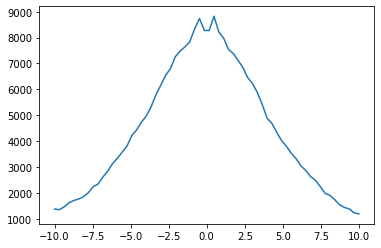

In [12]:
plt.plot(np.linspace(-10, 10, 64), counts_x);

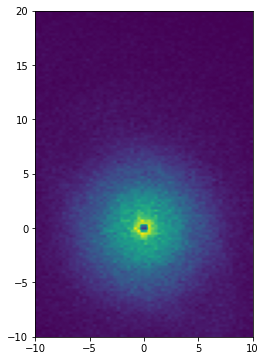

In [13]:
plt.figure(figsize=[12, 6])
xy_counts = df.count(
    binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=[64, 128])
plt.imshow(xy_counts.T, origin='lower', extent=[-10, 10, -10, 20]);

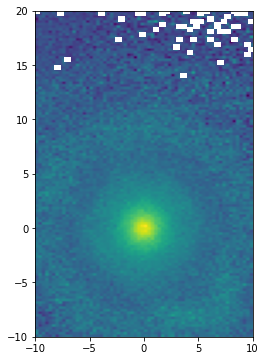

In [14]:
plt.figure(figsize=[12, 6])
v = np.sqrt(df.vx ** 2 + df.vy **2 + df.vz **2)
xy_mean_v = df.mean(
    v,
    binby=[df.x, df.y],
    limits=[[-10, 10], [-10, 20]],
    shape=[64, 128])
plt.imshow(xy_mean_v.T, origin='lower', extent=[-10, 10, -10, 20]);

In [15]:
x = np.arange(5)
y = x ** 2
# from_csv, from_pandas
df = vaex.from_arrays(x=x, y=y)  
df

#,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


In [16]:
nyc_taxi = vaex.open(
    's3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')
nyc_taxi.head()

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7319,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7204,3.7,0,nan,0,0,3.7
5,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6
6,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.984,40.7435,nan,nan,-73.9803,40.7489,5.7,0,nan,1,0,6.7
7,VTS,2009-01-04 04:31:00.000000000,2009-01-04 04:36:00.000000000,1,CASH,1.72,-73.9926,40.7484,nan,nan,-73.9956,40.7283,6.1,0.5,nan,0,0,6.6
8,CMT,2009-01-05 16:29:02.000000000,2009-01-05 16:40:21.000000000,1,Credit,1.6,-73.9697,40.7492,nan,nan,-73.9904,40.7511,8.7,0,nan,1.3,0,10
9,CMT,2009-01-05 18:53:13.000000000,2009-01-05 18:57:45.000000000,1,Cash,0.7,-73.9552,40.783,nan,nan,-73.9586,40.7748,5.9,0,nan,0,0,5.9


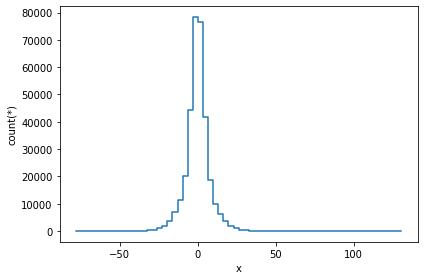

In [17]:
df = vaex.example()
df.viz.histogram(df.x);

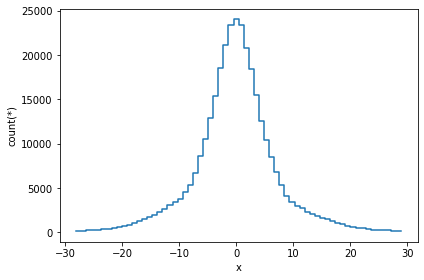

In [18]:
df.viz.histogram(df.x, limits='99.7%');

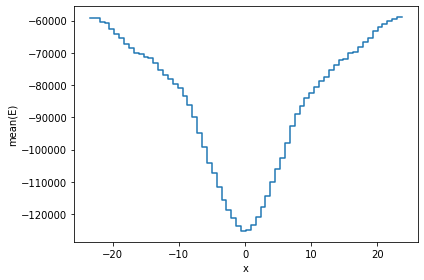

In [19]:
df.viz.histogram(df.x, what='mean(E)', limits='99%');

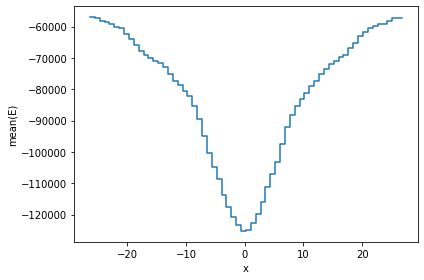

In [20]:
df.viz.histogram(df.x, what=vaex.stat.mean(df.E), limits='99.5%');

In [21]:
np.log(vaex.stat.mean(df.x) / vaex.stat.std(df.x))

log((mean(x) / std(x)))

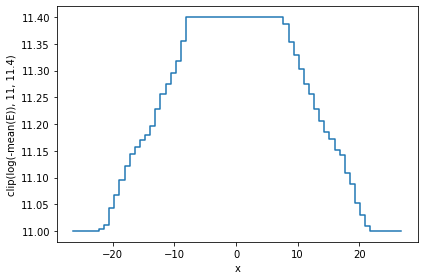

In [22]:
df.viz.histogram(
    df.x,
    what=np.clip(np.log(-vaex.stat.mean(df.E)), 11, 11.4),
    limits='99.5%');

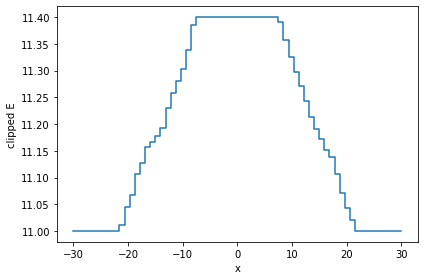

In [23]:
limits = [-30, 30]
shape = 64
meanE = df.mean(df.E, binby=df.x, limits=limits, shape=shape)
grid = np.clip(np.log(-meanE), 11, 11.4)
df.viz.histogram(df.x, grid=grid, limits=limits, ylabel='clipped E');

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: invalid value encountered in log
  result = function(*numpy_data, **kwargs)


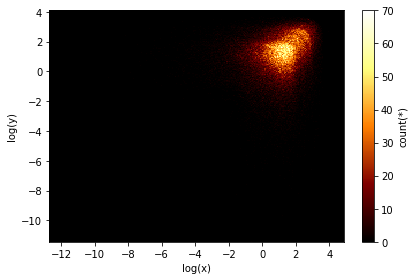

In [24]:
df.viz.heatmap(np.log(df.x), np.log(df.y));

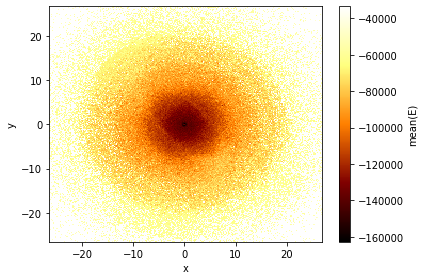

In [25]:
df.viz.heatmap(df.x, df.y, what=vaex.stat.mean(df.E), limits='99.5%');

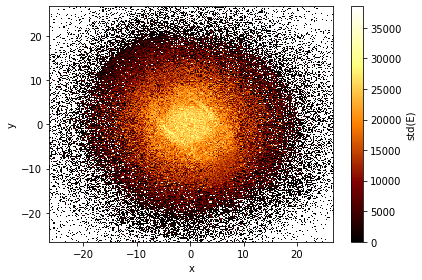

In [26]:
df.viz.heatmap(df.x, df.y, what=vaex.stat.std(df.E), limits='99.5%');

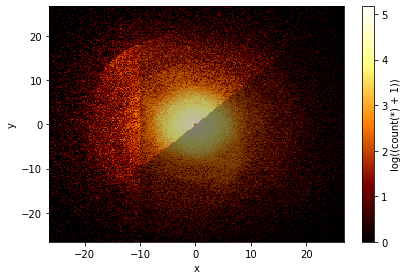

In [27]:
df.viz.heatmap(
    df.x,
    df.y,
    what=np.log(vaex.stat.count() + 1),
    limits='99.5%',
    selection=[None, df.x < df.y, df.x < -10]);

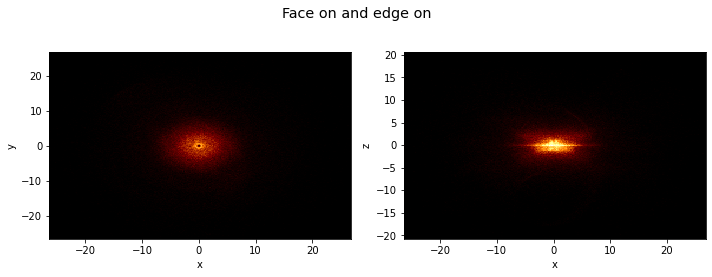

In [29]:
df.viz.heatmap(
    [['x', 'y'], ['x', 'z']],
    limits='99.5%',
    title='Face on and edge on',
    figsize=[10, 4]);

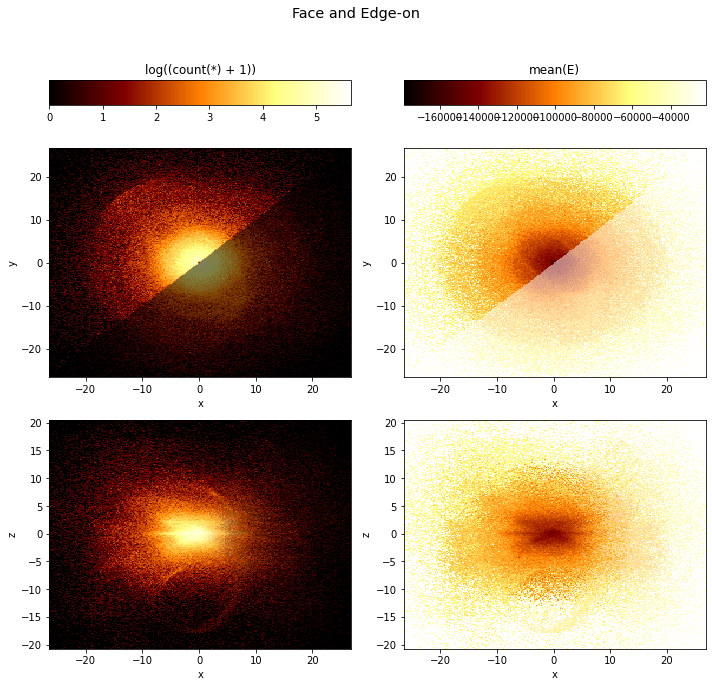

In [30]:
df.viz.heatmap(
    [['x', 'y'], ['x', 'z']],
    limits='99.5%',
    what=[np.log(vaex.stat.count() + 1), vaex.stat.mean(df.E)],
    selection=[None, df.x < df.y],
    title='Face and Edge-on',
    figsize=[10, 10]);

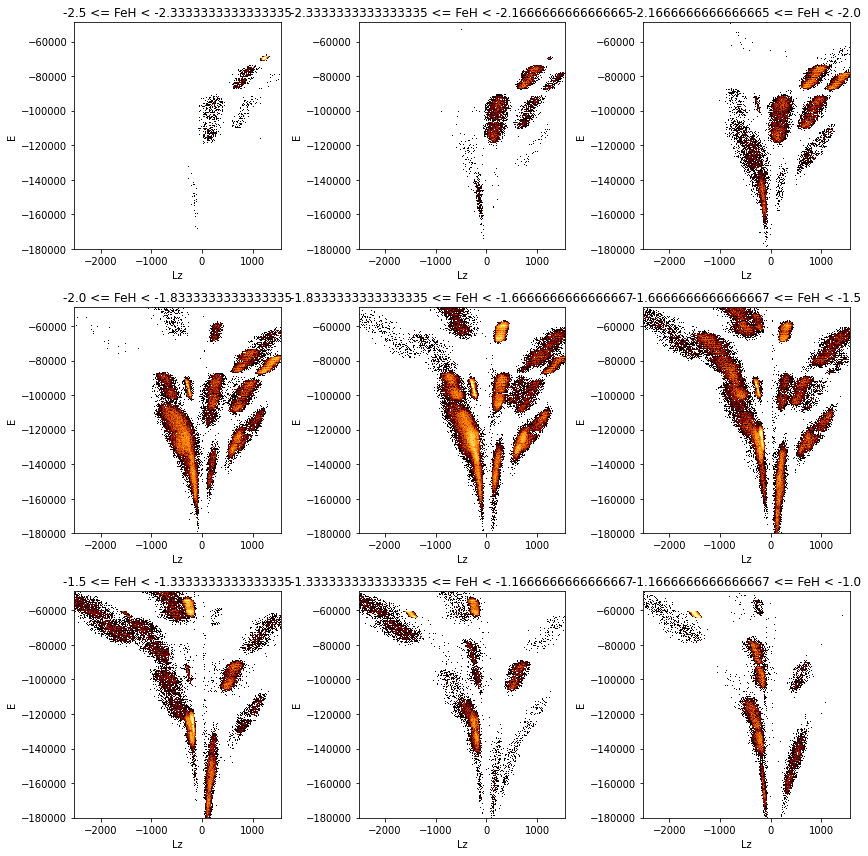

In [32]:
df.viz.heatmap(
    'Lz',
    'E',
    limits='99.5%',
    z='FeH:-2.5,-1,9',
    show=True,
    visual={'row': 'z'},
    figsize=[12, 12],
    f='log',
    wrap_columns=3);